In [3]:
import matplotlib.pyplot as plt
import numpy as np


def draw_fruits(arr, ratio=1):
  n = len(arr)
  rows= int(np.ceil(n/10))
  cols = n if rows< 2 else 10
  fig, axs = plt.subplots(rows, cols,
                          figsize = (cols*ratio, rows*ratio), squeeze= False)
  
  for i in range(rows):
    for j in range(cols):
      if i*10 + j <n:
        axs[i,j].imshow(arr[i*10+j], cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()

In [4]:
fruits = np.load('fruits_300.npy')
fruits.shape

(300, 100, 100)

In [5]:
fruits_2d = fruits.reshape(-1,10000)
fruits_2d.shape

(300, 10000)

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 50 ) # 만개를 50개로 축소
pca.fit(fruits_2d)

PCA(n_components=50)

In [7]:
pca.components_.shape  # 주성분 50 개 만개를 기반으로

(50, 10000)

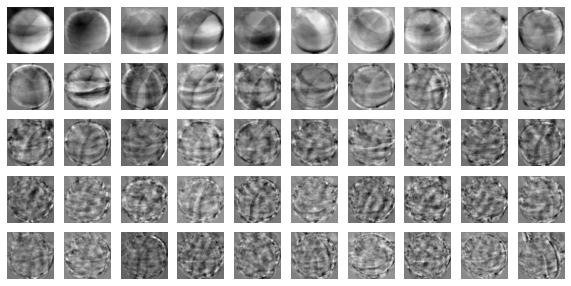

In [8]:
draw_fruits(pca.components_.reshape(-1,100,100)) # 어떤식으로 주성분을 찾았는지 그림
# 만개를 100,100 으로 그리기
# 사진 데이터 300장 에서 50개의 주성분
# 1등 부터 50등 까지
# 10개정도만 찾아도 잘 찾음.

In [9]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape # 300개의 만개의 픽셀을 50개의 픽셀로(주성분)

(300, 50)

In [10]:
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

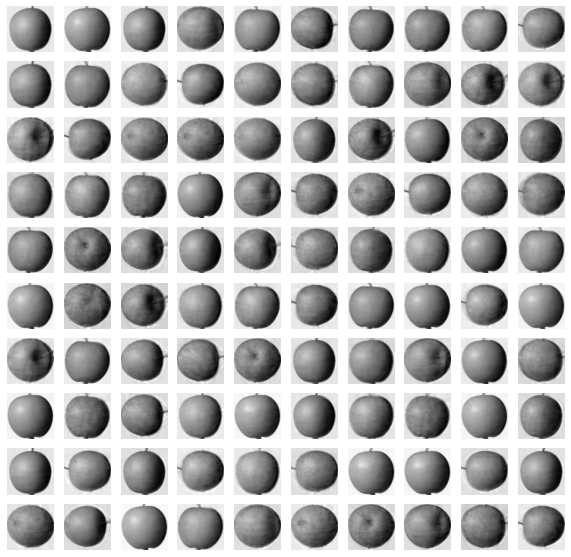

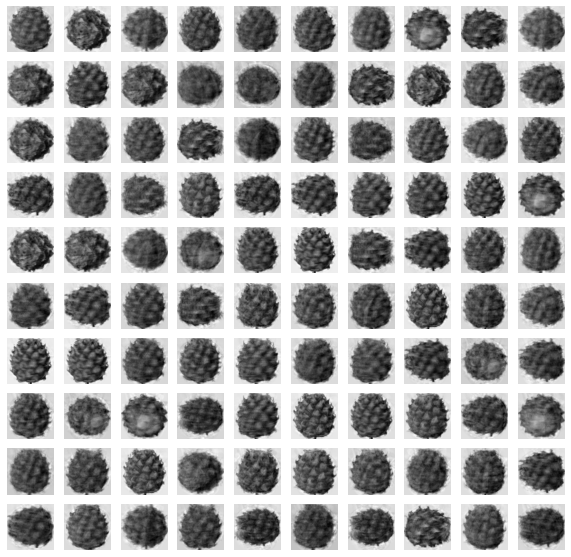

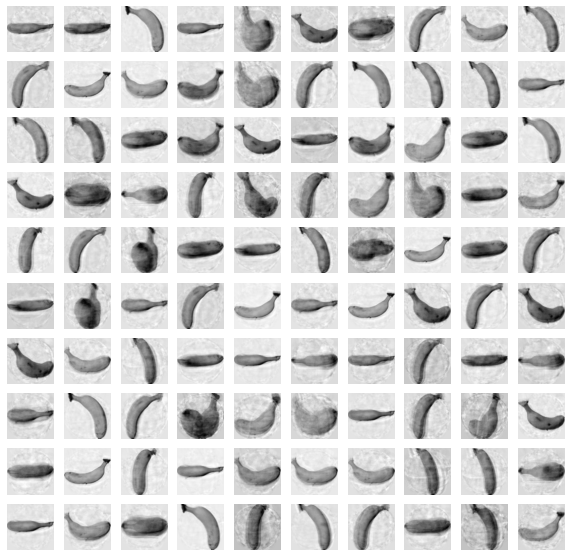

In [11]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)

for i in[0,100,200]:
  draw_fruits(fruits_reconstruct[i:i+100])
  print('\n')

In [12]:
# 화질 어느정도 깨졌지만 잘 표현했음 50 -> 10000 = 주성분을 굉장히 잘 잡았다.
# 주성분 분석하여 차원 축소하면 더 효과 좋다.

In [13]:
pca.explained_variance_ratio_ # 50개의 주성분의 대한 설명된 분산이 나온다.

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578895, 0.00511202, 0.00486384, 0.00480347,
       0.00447835, 0.00437317, 0.00408037, 0.00389469, 0.00372437,
       0.00359263, 0.00331437, 0.00317853, 0.00304322, 0.00303696,
       0.00288908, 0.00275878, 0.00264854, 0.00255821, 0.00252121,
       0.00247389, 0.00239678, 0.00230805, 0.00222095, 0.00216951,
       0.00213869, 0.00196366, 0.00192759, 0.00190647, 0.0018532 ,
       0.00182512, 0.00173952, 0.00168245, 0.00162513, 0.00160899])

In [14]:
np.sum(pca.explained_variance_ratio_)

0.9215927314207559

In [15]:
# 원본 이미지에서 92% 정도 복원했다.

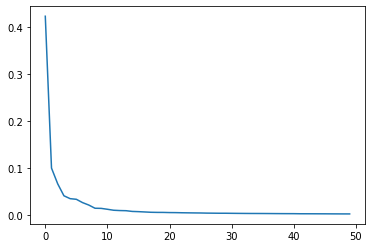

In [17]:
plt.plot(pca.explained_variance_ratio_)

In [18]:
#주성분 10개 정도만 찾아도 대부분의 분산을 표현하고 있다.
# 주성분 10000개 에서 2개 !
from sklearn.linear_model import LogisticRegression
# 정답데이터
target = np.array([0]*100+[1]*100+[2]*100)

In [23]:
pca = PCA(n_components=2)
pca.fit(fruits_2d)

PCA(n_components=2)

In [24]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

In [25]:
lr = LogisticRegression()

from sklearn.model_selection import cross_validate # 교차검증

scores= cross_validate(lr,fruits_pca,target)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [27]:
np.mean(scores['test_score'])

0.9933333333333334

In [28]:
# 99.3 % 과일 사진 맞춤

# 군집화?

from sklearn.cluster import KMeans

km=KMeans(n_clusters=3)
km.fit(fruits_pca)

KMeans(n_clusters=3)

In [29]:
np.unique(km.labels_,return_counts=True)

(array([0, 1, 2], dtype=int32), array([ 91,  99, 110]))

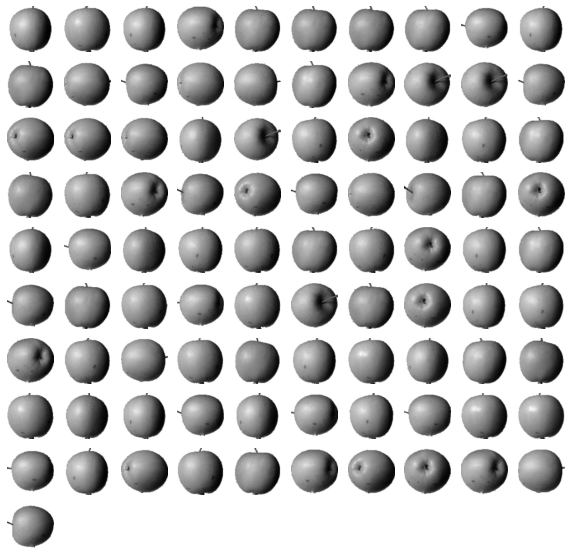

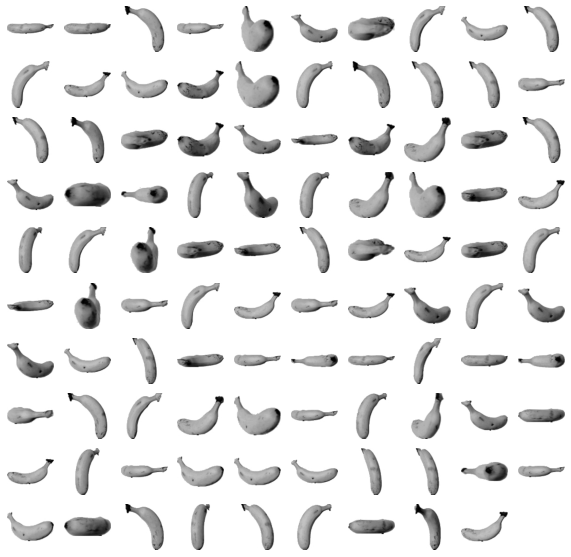

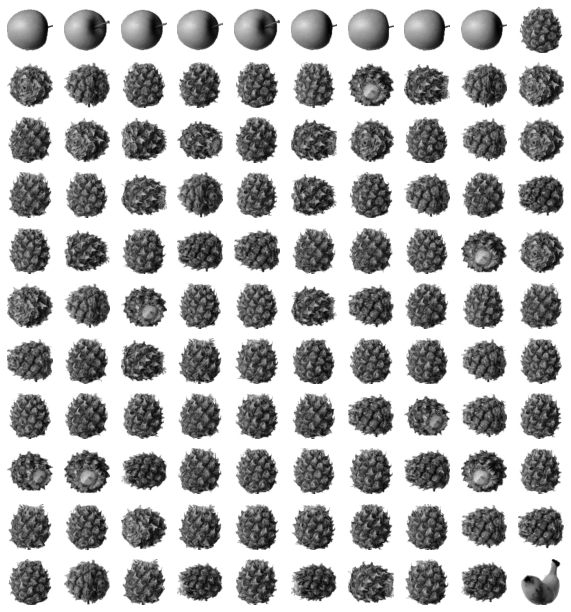

In [30]:
# 잘 군집화 했는지 그려보기
for i in range(0,3):
  draw_fruits(fruits[km.labels_ == i])
  print('\n')

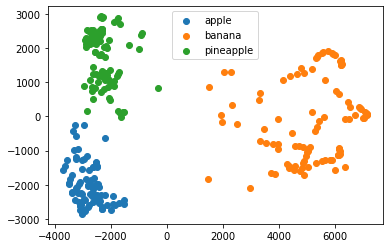

In [32]:
for i in range(0,3):
  data = fruits_pca[km.labels_ == i]
  plt.scatter(data[:,0],data[:,1])
plt.legend(['apple','banana','pineapple'])
plt.show()
